In [1]:
! pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 242.1 kB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
# load the dataset
file_path = r'C:\Users\HP\Documents\my data/CC GENERAL.csv'

In [4]:
data = pd.read_csv(file_path)

In [5]:
# drop customer id column adn handle the missing data with the median
data = data.drop('CUST_ID', axis=1)
data = data.fillna(data.median())

In [6]:
# feature scaling with StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

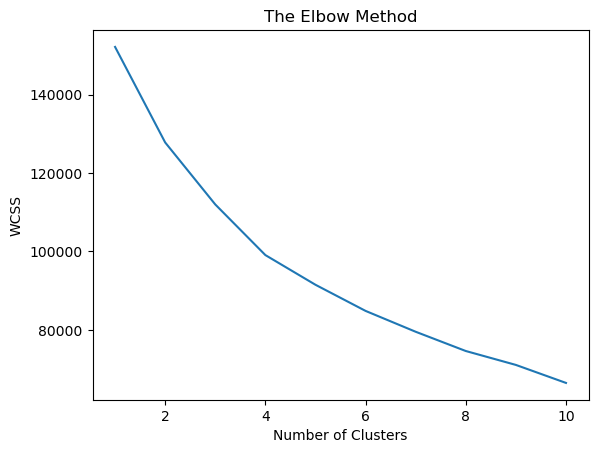

In [8]:
# normalization
from sklearn.cluster import KMeans
# determine no of optimal clusters for KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

    

In [10]:
# the best number of n clusters is where the curve decrease in slope
k=4
# now we can prdictions with the appropriate number of clusters

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# now seaborn is used to visualize the clusters
import seaborn as sns
# add a clusters column to the original dataset
data['Clusters'] = cluster_labels

<Figure size 2000x1200 with 0 Axes>

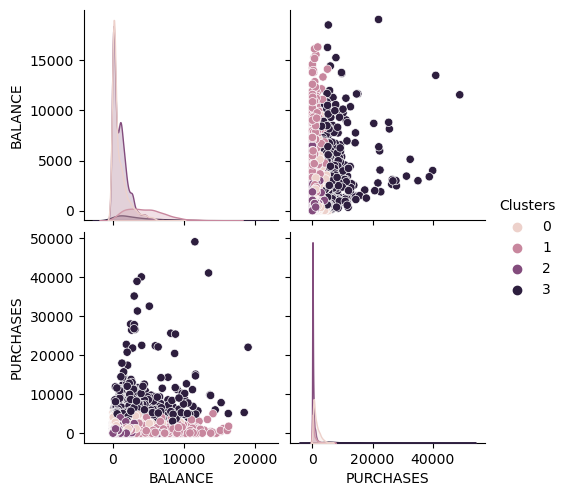

In [14]:
# Visualize the clusters using a pairplot with two selected features
plt.figure(figsize=(20, 12))
sns.pairplot(data, vars=['BALANCE', 'PURCHASES'], hue='Clusters')
plt.show()

In [15]:
# Analyze the characteristics of each cluster
cluster_summary = data.groupby("Clusters").mean()
print(cluster_summary)

              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Clusters                                                                  
0          894.907458           0.934734  1236.178934        593.974874   
1         4602.449658           0.968389   501.862982        320.188797   
2         1012.658327           0.789924   270.041785        209.937299   
3         3551.153761           0.986879  7681.620098       5095.878826   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Clusters                                                              
0                     642.478274    210.570626             0.885165   
1                     181.759123   4521.509581             0.287832   
2                      60.371441    596.509903             0.170145   
3                    2587.208264    653.638891             0.946418   

          ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Clusters                                        

The end of the model using KMeans.